<a href="https://colab.research.google.com/github/va22abb/Msc-Data-Project-Comparative-study-of-machine-learning-algorithms-in-predicting-cervical-cancer/blob/cerevical-cancer-modelling/Cervical_Cancer_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cervical Cancer Prediction Model**

## **Importing All The Required Libraries**

In [1]:
# Import the Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import shap



from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# **Mounting My Drive**

In [2]:
# Mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading The Dataset**

In [3]:
# Loading the datasets
df = pd.read_csv('/content/drive/MyDrive/My Project/cervical_cancer_risk_factors_dataset.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# **Data Preprocessing**

In [4]:
# Replacing '?' with None
df.replace('?', None, inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
2,34,1.0,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,None,None,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,None,None,0,0,0,0,0,0,0,0


In [5]:
# The necessary information of my data and statisics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [6]:
# Converting object columns to float in my data
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
# Checking information of my dataset and statisics after covertion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [8]:
# locating columns with missing values
def missing_values_table(df):
        # Total missing values in each column
        mis_val = df.isnull().sum()

        #  Calculating the percentage of missing values in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Making a table with the output
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renaming the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sorting columns by highest percentage of missing data
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Printing a summary of missing data information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Returning the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 36 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD,117,13.6
IUD (years),117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:vulvo-perineal condylomatosis,105,12.2
STDs:HPV,105,12.2
STDs:Hepatitis B,105,12.2
STDs:HIV,105,12.2


In [10]:
# Dropping the two columns with excesive missing values
df.drop('STDs: Time since first diagnosis', inplace=True, axis=1)
df.drop('STDs: Time since last diagnosis', inplace=True, axis=1)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
# using the drop_duplicates method to remove duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [12]:
# filling the missing data in the dataset with the mean values for each of the columns.
data = df.fillna(df.mean())
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [13]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
data_missing= missing_values_table(data)
data_missing

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# **The Exploratory Data Analysis (EDA)**

In [14]:
# using the describe method to check the statistical summary of the dataset
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,0.002721,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.651365,2.805153,1.406092,0.354138,4.108329,2.238619,0.446366,3.552168,0.296809,...,0.048904,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


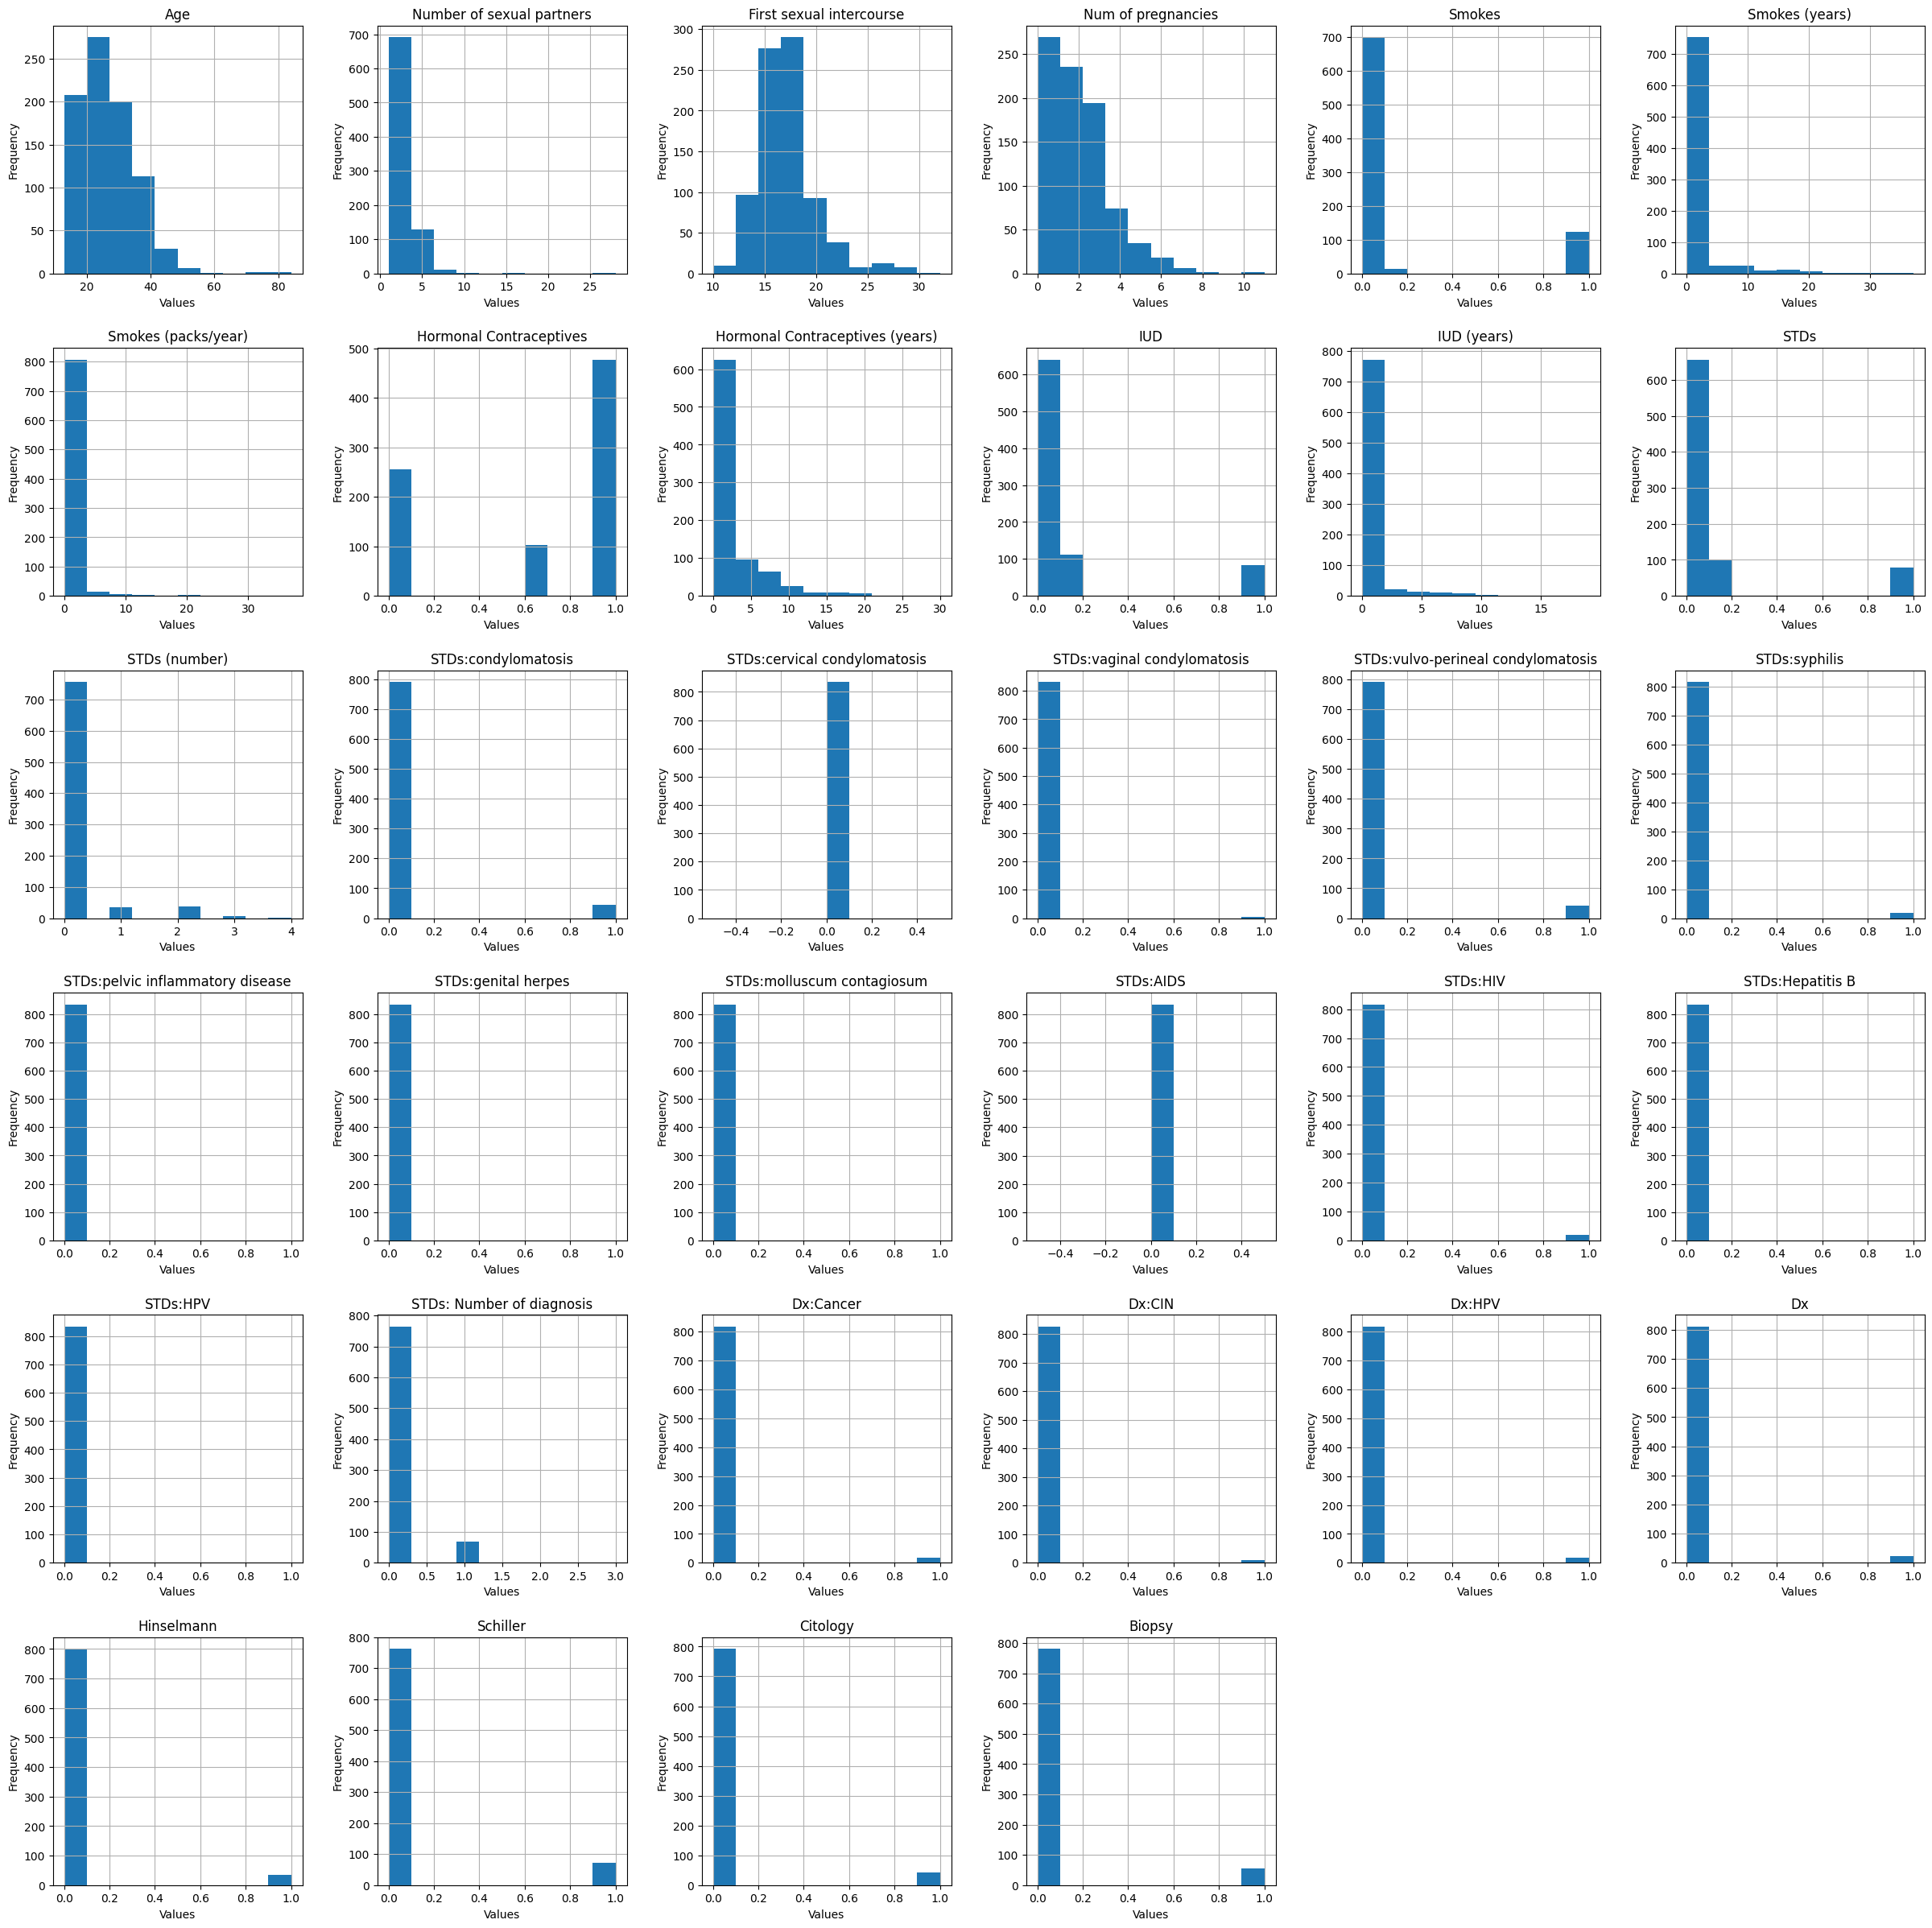

In [15]:
# plotting variation graphs for each property
axes = data.hist(figsize=(30, 30))
for ax in axes.flatten():
    ax.set_xlabel("Values")  # Setting x-axis label
    ax.set_ylabel("Frequency")  # Setting y-axis label
plt.show()

# **Insight of Variation Graph(Histogram)**

**TARGET VARIABLE**


Biopsy: This is the target variable and appears to be imbalanced, with most values concentrated at zero, indicating fewer positive biopsy results.

**FEATURES VARIABLES**

Age: Shows a distribution skewed toward younger ages, with most data points concentrated in the lower range. This suggests that the dataset includes a higher number of younger individuals.

Number of sexual partners: This feature has a skewed distribution, with most values concentrated at lower counts, indicating that a majority of the individuals reported fewer sexual partners.

First sexual intercourse: This feature is also skewed, suggesting that most individuals had their first sexual experience in their late teens.

Num of pregnancies: This distribution shows that most individuals have had only a few pregnancies, with a sharp drop-off as the number of pregnancies increases.

Smokes and Smokes (years): A large portion of the data has values near zero for both smoking frequency and years of smoking, which might indicate a lower smoking rate among the individuals in the dataset.

Other Features: Most of the features related to STDs, including "STDs: condylomatosis," "STDs: HPV," and others, show distributions heavily skewed toward zero or "no" responses. This might imply that a small number of individuals in the dataset reported histories of these specific conditions.

In [16]:
# Checking the correlation among the dataset
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070393,0.360942,0.516255,0.046625,0.213631,0.128271,0.039047,0.267937,0.264234,...,0.037987,-0.008673,0.108519,0.059899,0.099765,0.089979,-0.009050,0.101150,-0.019194,0.054396
Number of sexual partners,0.070393,1.000000,-0.155194,0.066302,0.234549,0.174446,0.173685,-0.009221,0.010643,0.025579,...,0.013303,0.047791,0.020319,0.014289,0.025316,0.020654,-0.042595,-0.017298,0.014021,-0.009584
First sexual intercourse,0.360942,-0.155194,1.000000,-0.070213,-0.128780,-0.061682,-0.058716,0.003008,0.001125,-0.024437,...,0.032938,-0.016102,0.066566,-0.033861,0.043034,0.034535,-0.018585,0.003783,-0.009438,0.008496
Num of pregnancies,0.516255,0.066302,-0.070213,1.000000,0.073625,0.170801,0.094033,0.125954,0.199409,0.194578,...,-0.029361,0.028102,0.032414,0.006463,0.044150,0.016422,0.035146,0.087259,-0.029993,0.044011
Smokes,0.046625,0.234549,-0.128780,0.073625,1.000000,0.722303,0.492470,-0.010657,0.039673,-0.054692,...,0.048794,0.092576,-0.012670,-0.044132,0.010629,-0.069700,0.032292,0.052422,-0.004358,0.028471
Smokes (years),0.213631,0.174446,-0.061682,0.170801,0.722303,1.000000,0.723737,-0.017558,0.045585,0.025168,...,0.050636,0.079563,0.053593,-0.031877,0.056138,-0.050345,0.069674,0.094223,-0.007120,0.061448
Smokes (packs/year),0.128271,0.173685,-0.058716,0.094033,0.492470,0.723737,1.000000,0.001623,0.037833,0.006215,...,-0.008668,0.030668,0.107777,-0.021734,0.109668,-0.034325,0.025542,0.017251,0.004477,0.024430
Hormonal Contraceptives,0.039047,-0.009221,0.003008,0.125954,-0.010657,-0.017558,0.001623,1.000000,0.444087,0.026560,...,0.038642,-0.058004,0.023485,-0.005541,0.035531,-0.005400,0.029373,-0.005414,-0.008712,0.008858
Hormonal Contraceptives (years),0.267937,0.010643,0.001125,0.199409,0.039673,0.045585,0.037833,0.444087,1.000000,0.091109,...,0.051646,-0.041006,0.052932,0.001884,0.059837,-0.014990,0.036274,0.078274,0.076046,0.079738
IUD,0.264234,0.025579,-0.024437,0.194578,-0.054692,0.025168,0.006215,0.026560,0.091109,1.000000,...,-0.019070,0.027415,0.109352,0.051267,0.056945,0.137831,0.042244,0.083607,0.007454,0.051631


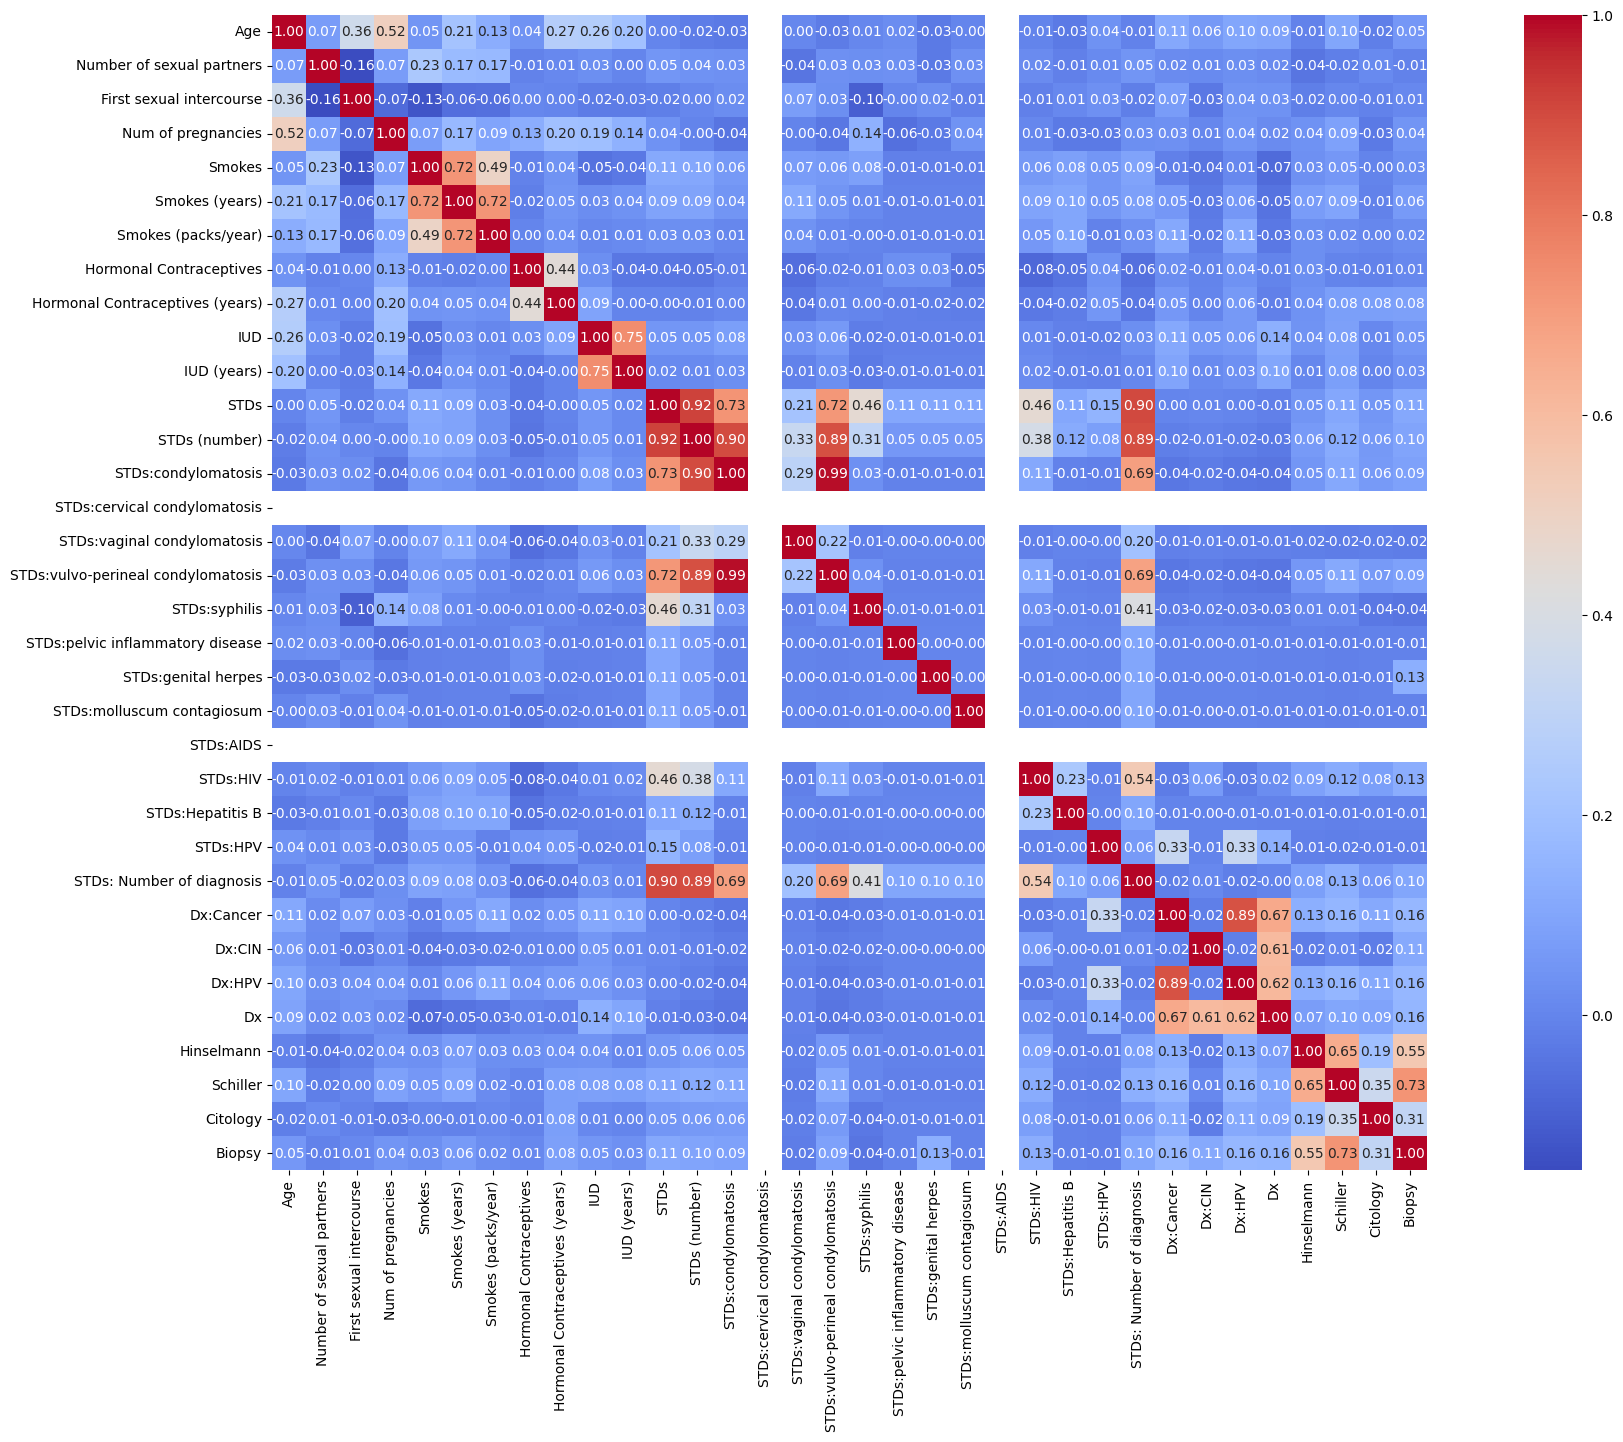

In [17]:
# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap with a specified figure size
plt.figure(figsize=(25, 15))  # Adjustng the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()


# **Correlation Heatmap Insight**
The correlation heatmap illustrates relationships between features, with values ranging from -1, indicating a perfect negative correlation, to 1, indicating a perfect positive correlation, and 0 indicating no linear relationship. Features such as STDs: Number of diagnoses strongly correlate with STDs (number) and specific STD indicators like STDs: syphilis and STDs: HPV. Similarly, Smokes (packs/year) and Smokes (years) are highly correlated, reflecting shared smoking behaviour. Moderate correlations are observed between First sexual intercourse and Age, with a negative correlation suggesting younger sexual initiation among older individuals in the dataset, and between Hormonal contraceptives (years) and Number of pregnancies, reflecting reproductive health patterns. Some features, such as STDs: AIDS and STDs: Cervical condylomatosis, exhibit no correlation with other variables, indicating irrelevance to predictive insights. Removing such low-correlation features simplifies the dataset, reduces computational cost, and improves model performance. The heatmap highlights multicollinearity(provide similar information), aiding in feature selection and dimensionality reduction.

In [18]:
# Dropping the two columns that has no correlation at all with other columns in the dataset
data = data.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)

In [19]:
# Display the first 5 rows of the dataset after dropping the two columns
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# **Feature Importance**

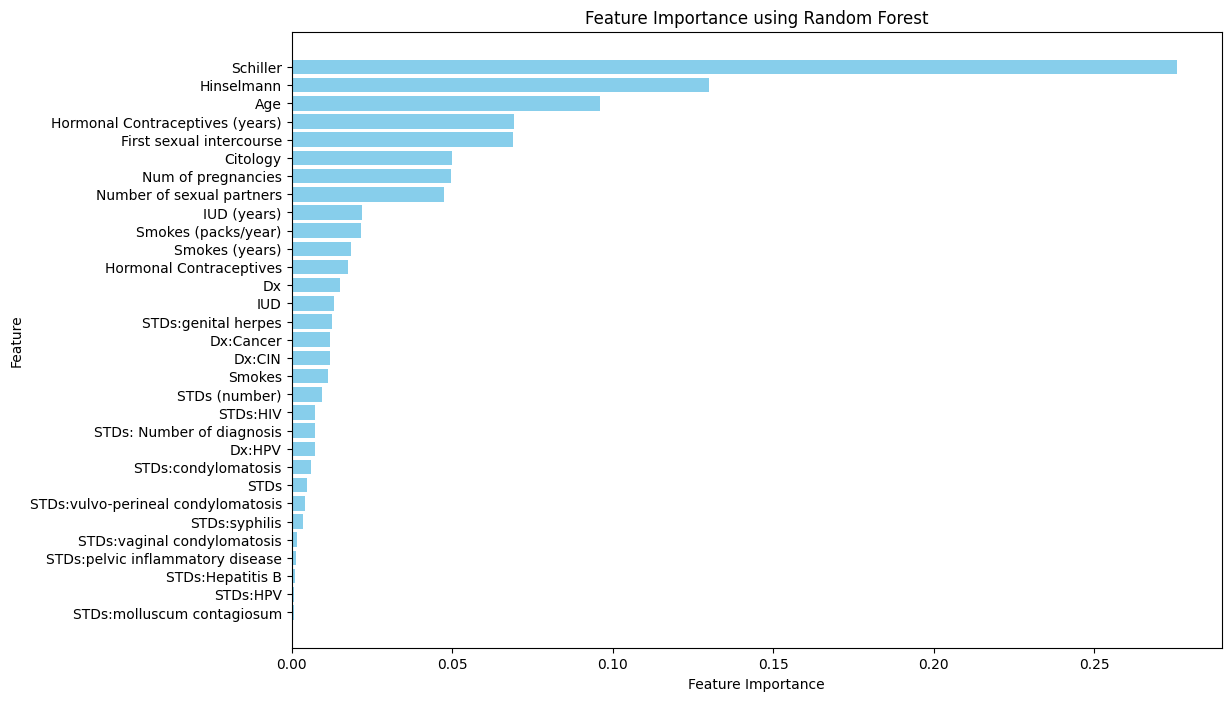

In [20]:
# Dropping the target variable and defining input features (X) and the target (y) for prediction
X = data.drop(columns=['Biopsy'])
y = data['Biopsy']

# Initializing and training the Random Forest model on the dataset
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Getting feature importances values into a Dataframe for easier use
importances = model.feature_importances_
feature_names = X.columns

# Creating a feature importances into DataFrame for easier visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plotting feature importances to highlight key predictive factors in the model
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()


# **Insight of the feature importance**
This Random Forest feature importance graph highlights the variables most critical to the model's predictive performance. The "Schiller" feature ranks highest, significantly influencing predictions, followed by "Hinselmann", "Age", and "Hormonal Contraceptives (years)". These top features provide the model with substantial predictive power.

Mid-tier features like "First sexual intercourse", "Citology", "Num of pregnancies", and "Number of sexual partners" moderately impact the model. In contrast, features related to sexually transmitted diseases (e.g., "STDs: genital herpes", "STDs: HIV") and "IUD (years)" have lower importance, suggesting limited or redundant contributions.

This analysis identifies the key variables driving predictions, allowing prioritisation of data collection and model optimisation around top-ranking features. Less important features might be excluded to streamline the model without affecting accuracy. Overall, this visualisation aids in understanding the model's decision-making process and supports targeted feature engineering..








In [21]:
# Creating a DataFrame for feature importances  and display them in descending order
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Displaying the feature importances table
feature_importances

,Feature,Importance
29,Schiller,0.275823
28,Hinselmann,0.130149
0,Age,0.096198
8,Hormonal Contraceptives (years),0.069326
2,First sexual intercourse,0.068908
30,Citology,0.050087
3,Num of pregnancies,0.049574
1,Number of sexual partners,0.047588
10,IUD (years),0.021975
6,Smokes (packs/year),0.021715


In [22]:
# Keeping only features with an importance score of 0.01 or higher
important_features = feature_importances[feature_importances['Importance'] >= 0.01]['Feature']

# Selecting only the important features from the original data
data_important = data[important_features]

# Showing the retained columns
print("Retained columns:")
data_important.head(10)

Retained columns:


,Schiller,Hinselmann,Age,Hormonal Contraceptives (years),First sexual intercourse,Citology,Num of pregnancies,Number of sexual partners,IUD (years),Smokes (packs/year),Smokes (years),Hormonal Contraceptives,Dx,IUD,STDs:genital herpes,Dx:Cancer,Dx:CIN,Smokes
0,0,0,18,0.0,15.000000,0,1.000000,4.0,0.000000,0.0,0.000000,0.0,0,0.000000,0.0,0,0,0.0
1,0,0,15,0.0,14.000000,0,1.000000,1.0,0.000000,0.0,0.000000,0.0,0,0.000000,0.0,0,0,0.0
2,0,0,34,0.0,17.020531,0,1.000000,1.0,0.000000,0.0,0.000000,0.0,0,0.000000,0.0,0,0,0.0
3,0,0,52,3.0,16.000000,0,4.000000,5.0,0.000000,37.0,37.000000,1.0,0,0.000000,0.0,1,0,1.0
4,0,0,46,15.0,21.000000,0,4.000000,3.0,0.000000,0.0,0.000000,1.0,0,0.000000,0.0,0,0,0.0
5,0,0,42,0.0,23.000000,0,2.000000,3.0,0.000000,0.0,0.000000,0.0,0,0.000000,0.0,0,0,0.0
6,1,1,51,0.0,17.000000,0,6.000000,3.0,7.000000,3.4,34.000000,0.0,0,1.000000,0.0,0,0,1.0
7,0,0,26,2.0,26.000000,0,3.000000,1.0,7.000000,0.0,0.000000,1.0,0,1.000000,0.0,0,0,0.0
8,0,0,45,0.0,20.000000,0,5.000000,1.0,0.000000,0.0,0.000000,0.0,1,0.000000,0.0,1,0,0.0
9,0,0,44,0.0,15.000000,0,2.304236,3.0,0.527621,2.8,1.266973,0.0,0,0.114799,0.0,0,0,1.0


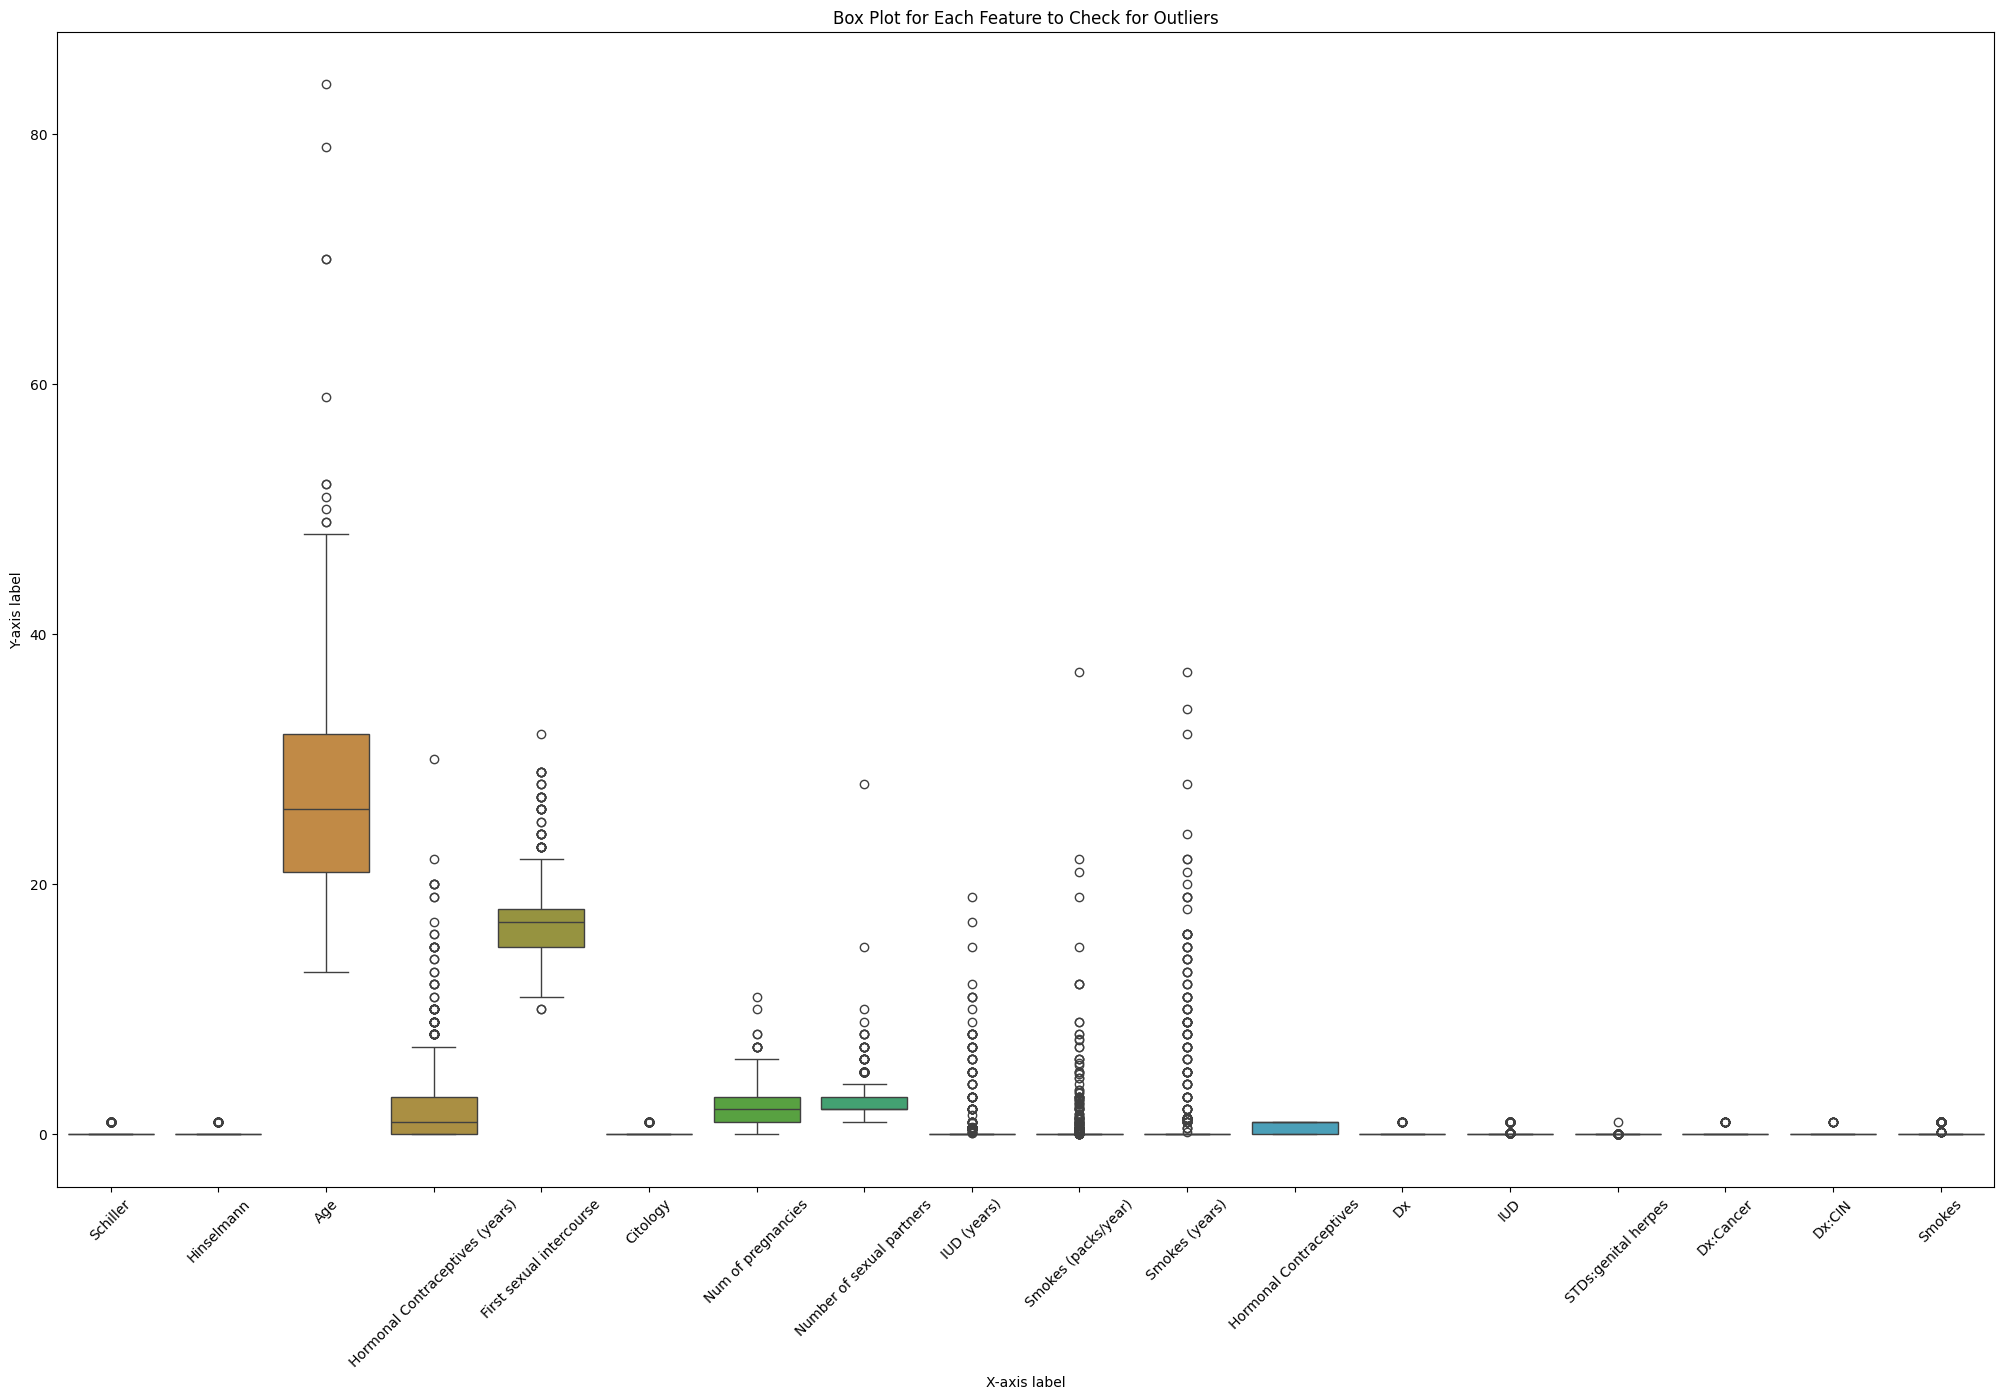

In [23]:
# Setting up the plot size
plt.figure(figsize=(25, 15))

# Using seaborn's boxplot function box plot for important features
sns.boxplot(data=data_important)

# Adding labels and a title to the plot
plt.xticks(rotation=45)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot for Each Feature to Check for Outliers')

# Display the plot
plt.show()

The box plot visualises the distribution of multiple features in the dataset, highlighting potential outliers and spread. Each box represents the interquartile range (IQR), with the line inside marking the median. The whiskers extend to show the range of data within 1.5 times the IQR, and dots outside the whiskers indicate outliers.

* Age has a wide range and several outliers above 60, suggesting extreme values in older individuals.
* Hormonal Contraceptives (years), First sexual intercourse, and Number of pregnancies have moderate ranges but show numerous outliers, indicating variability in reproductive-related data.
* Smoking-related features (Smokes (packs/year), Smokes (years)) exhibit significant outliers, reflecting variation in smoking habits among participants.
* Features such as Schiller, Hinselmann, and Dx have limited spread, with most values clustered near zero and few outliers.
* Other features, like IUD and sexually transmitted disease indicators, have very compact distributions, suggesting sparse data or binary attributes.

This analysis helps identify data anomalies and informs preprocessing steps like outlier handling.

Biopsy
Negative    93.532934
Positive     6.467066
Name: proportion, dtype: float64


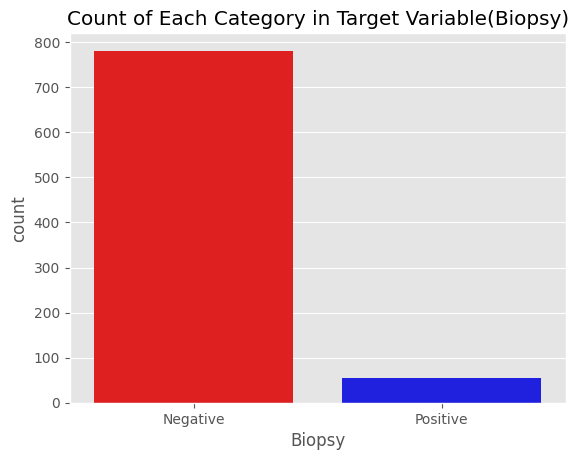

In [24]:
# Replacing 0 with 'Negative' and 1 with 'Positive'
data['Biopsy'] = data['Biopsy'].replace({0: 'Negative', 1: 'Positive'})

# Plotting with updated labels and adding different colors
plt.style.use('ggplot')
sns.countplot(x='Biopsy', data=data, palette=['red', 'blue']).set_title('Count of Each Category in Target Variable(Biopsy)')

# showing the normalized value counts
print(data['Biopsy'].value_counts(normalize=True) * 100)
plt.show()

# **Splitting dataset to Train and Test**

In [25]:
# Assigning important features to X for model training and analysis
X = data_important

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Feature Scaling**

In [26]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Machine Learning Modeling**

# Using Support Vector Classification (SVC)

In [27]:
# Creating and fitting the SVM model with balanced class weights
svm_model = SVC(class_weight='balanced', kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[[222  13]
 [  4  12]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       235
           1       0.48      0.75      0.59        16

    accuracy                           0.93       251
   macro avg       0.73      0.85      0.77       251
weighted avg       0.95      0.93      0.94       251



# Using Random Forest Classifier

In [28]:
# Creating and fitting the Random Forest model with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[229   6]
 [  5  11]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       235
           1       0.65      0.69      0.67        16

    accuracy                           0.96       251
   macro avg       0.81      0.83      0.82       251
weighted avg       0.96      0.96      0.96       251



# Using XGBoost Model

In [29]:
# Calculate scale_pos_weight (this is an approximation to balance the class weights)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[227   8]
 [  4  12]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       235
           1       0.60      0.75      0.67        16

    accuracy                           0.95       251
   macro avg       0.79      0.86      0.82       251
weighted avg       0.96      0.95      0.95       251



In [41]:
# Defining a function to evaluate accuracy for a model
def evaluate_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

# Evaluating the SVM model
svm_accuracy = evaluate_accuracy(y_test, y_pred_svm)

# Evaluating the Random Forest model
rf_accuracy = evaluate_accuracy(y_test, y_pred_rf)

# Evaluating the XGBoost model
xgb_accuracy = evaluate_accuracy(y_test, y_pred_xgb)

# Creating a comparison table
results_table = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [round(svm_accuracy, 2), round(rf_accuracy, 2), round(xgb_accuracy, 2)]
})

# Visualizing the table
print("\nComparison of Model Accuracy:")
print(results_table)

# Optionally,Saving the table to CSV file
results_table.to_csv("model_accuracy_comparison.csv", index=False)


Comparison of Model Accuracy:
           Model  Accuracy
0            SVM      0.93
1  Random Forest      0.96
2        XGBoost      0.95


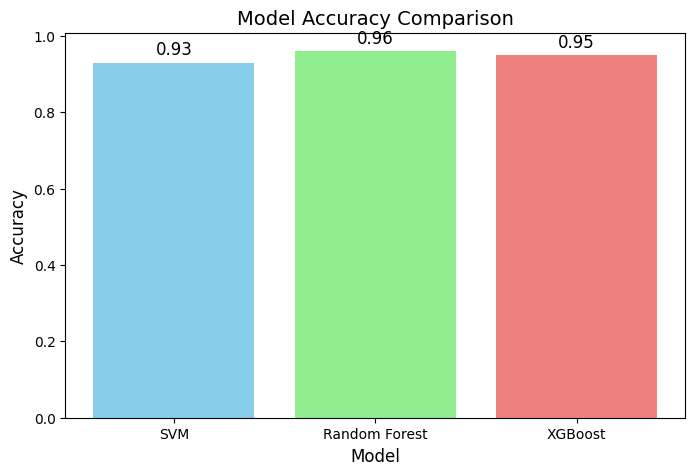

In [42]:
# Plotting the accuracy comparison bar chart
plt.figure(figsize=(8, 5))
plt.bar(results_table['Model'], results_table['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral'])

# Adding labels and title
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Showing the accuracy values on top of the bars
for i, v in enumerate(results_table['Accuracy']):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# **Confusion Matrix: Visualizing Model Performance**

In [30]:
# Function to plot a confusion matrix for visualizing model performance
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute the confusion matrix based on true and predicted labels
    cm = confusion_matrix(y_true, y_pred)

    # Setting the size of the plot
    plt.figure(figsize=(8, 6))

    # Plotting the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Adding a title to the plot
    plt.title(title)

    # Labelling the x-axis to indicate predicted classes
    plt.xlabel('Predicted')

    # Labelling the y-axis to indicate true classes
    plt.ylabel('True')

    # Displing the plot
    plt.show()


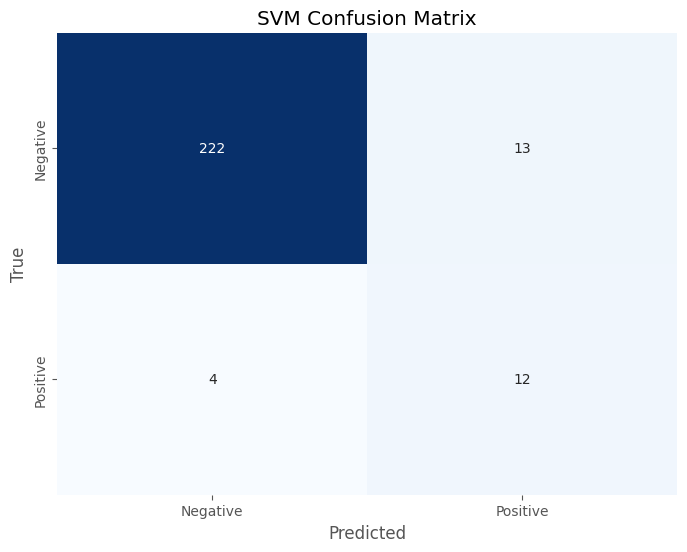

In [31]:
# Plotting heatmap for SVM confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, title='SVM Confusion Matrix')

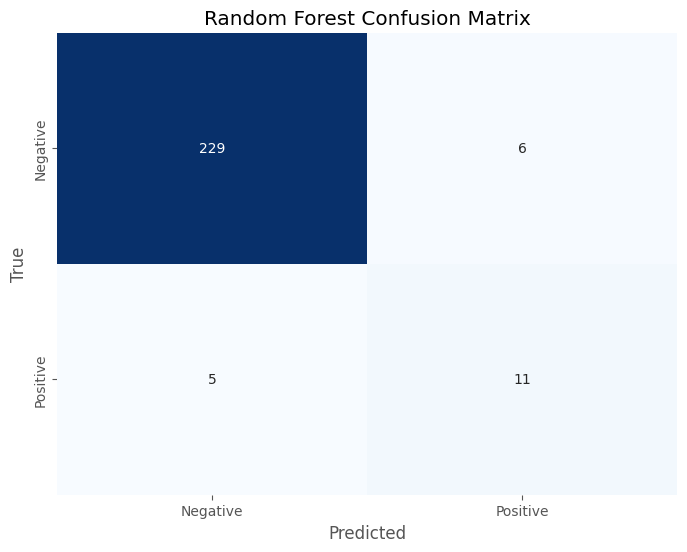

In [32]:
# Plotting heatmap for Random Forest confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, title='Random Forest Confusion Matrix')

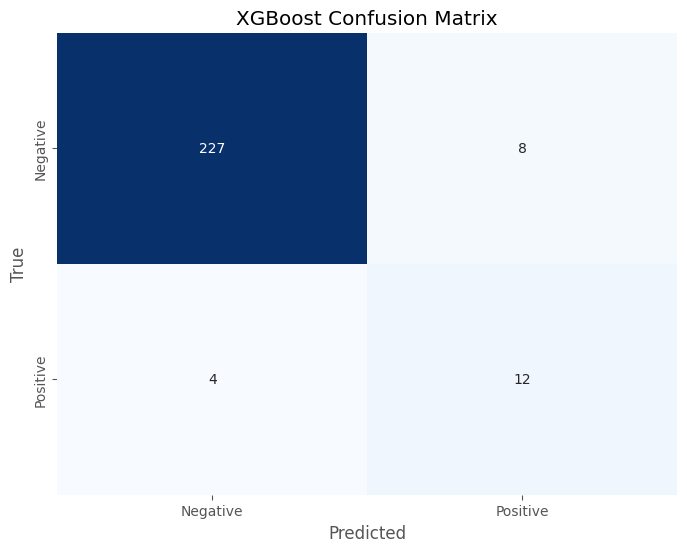

In [33]:
# Plotting heatmap for XGBoost confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb, title='XGBoost Confusion Matrix')

In [34]:
# Resetting the matplotlib state
plt.clf()
plt.close('all')
plt.style.use('default')  # Ensuring consistent plotting style

# Function to plot ROC curve
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR)
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

   # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Geting predicted probabilities for the Models
# Getting Decision function for SVC
y_scores_svm = svm_model.decision_function(X_test_scaled)

# Geting predicted probabilities for Random Forest
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Get predicted probabilities for XGBoost
y_scores_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

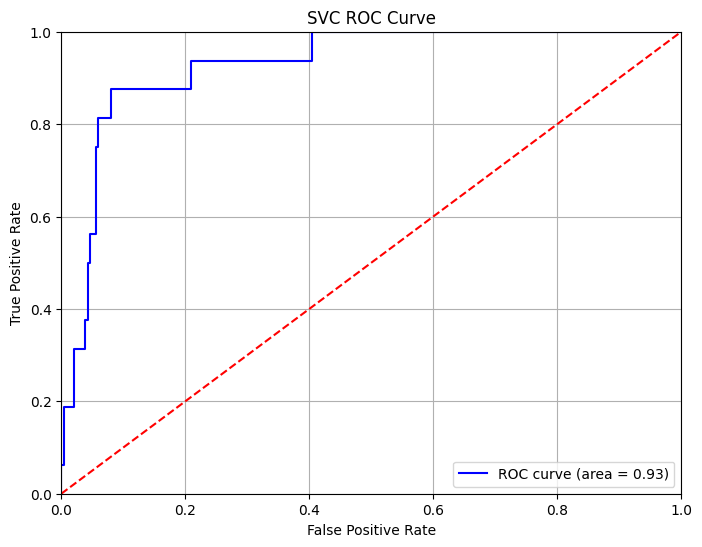

In [35]:
# Ploting ROC curve for SVM
plot_roc_curve(y_test, y_scores_svm, title='SVC ROC Curve')

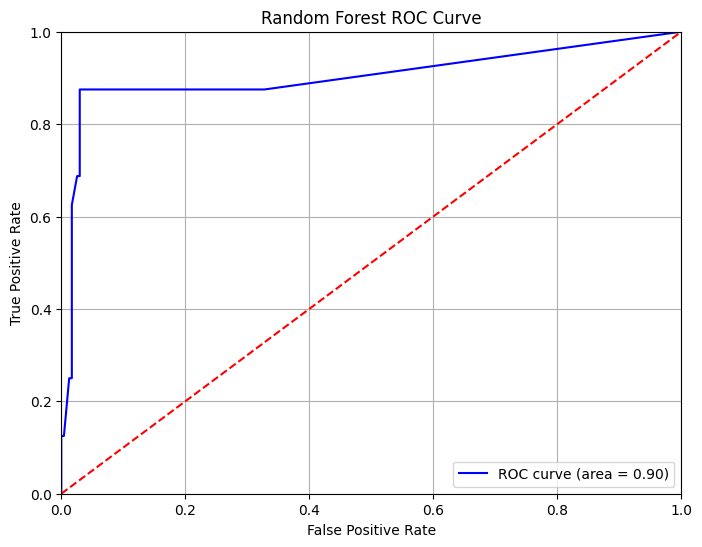

In [36]:
# Plot ROC curve for Random Forest
plot_roc_curve(y_test, y_scores_rf, title='Random Forest ROC Curve')

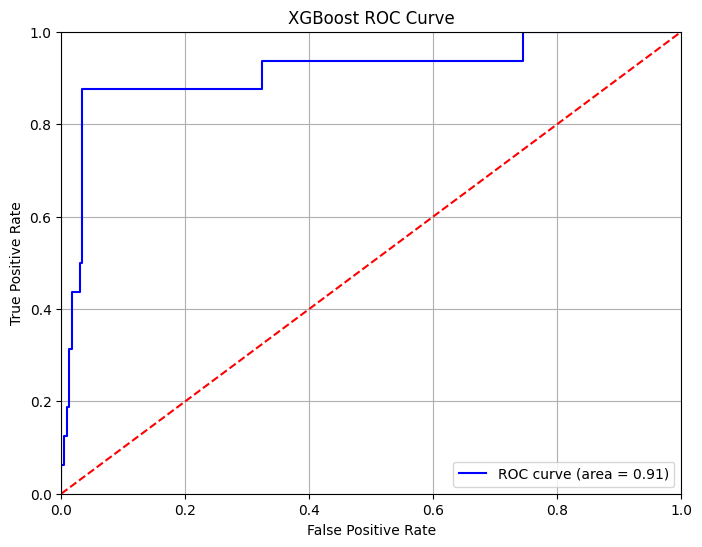

In [37]:
# Plot ROC curve for XGBoost
plot_roc_curve(y_test, y_scores_xgb, title='XGBoost ROC Curve')

# **Explainable AI using SHAP**

In [38]:
# Fitting the explainer using Random Forest model and test data
explainer = shap.Explainer(rf_model.predict, X_test_scaled)

# Calculating the SHAP values
shap_values = explainer(X_test)

PermutationExplainer explainer: 252it [01:10,  3.33it/s]


In [39]:
# Using SHAP values to interpret feature contributions in the Random Forest model predictions.
shap_values

.values =
array([[-0.02807692, -0.00692308, -0.00346154, ...,  0.        ,
         0.        ,  0.00038462],
       [-0.02384615, -0.00807692, -0.00615385, ...,  0.        ,
         0.        ,  0.00230769],
       [-0.02461538, -0.00923077, -0.00423077, ...,  0.        ,
         0.        ,  0.00076923],
       ...,
       [-0.02115385, -0.00192308, -0.00807692, ...,  0.        ,
         0.        ,  0.00192308],
       [-0.02615385, -0.00769231, -0.00230769, ...,  0.        ,
         0.        ,  0.00038462],
       [-0.01961538, -0.00807692, -0.00461538, ...,  0.        ,
         0.        , -0.00038462]])

.base_values =
array([0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.

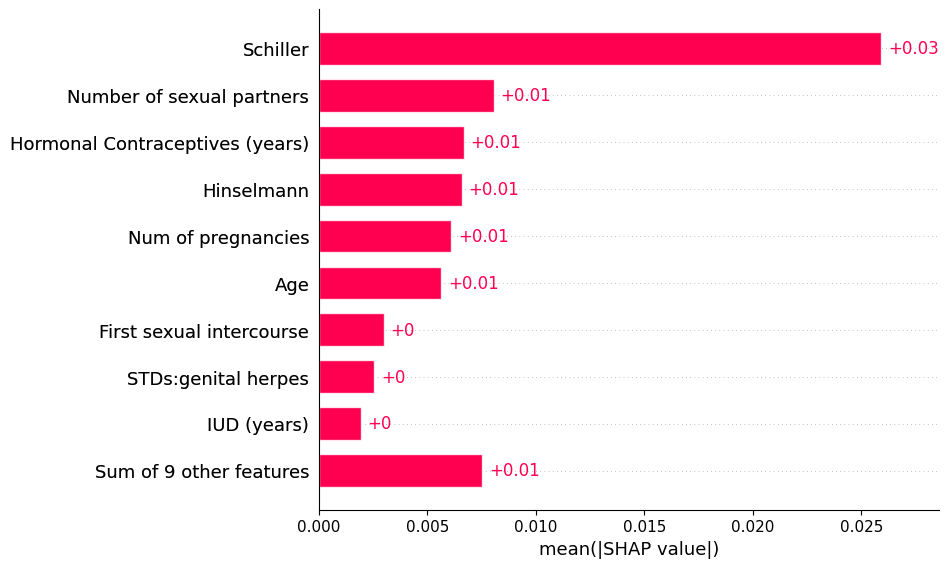

In [40]:
#Visuaslizing Bar plot of top features using SHAP values
shap.plots.bar(shap_values)

This is a SHAP summary Bar plot, which visualizes the impact of various features on Random Forest machine learning model’s predictions. Specifically, this chart shows the mean absolute SHAP values for each feature, indicating their relative importance in making predictions.

## Key elements of the plot:
  1. Features (y-axis): The plot lists the features (such as "Schiller", "Number of sexual partners", "Hormonal Contraceptives (years)", etc.) that were used in the model.
  2. Mean(|SHAP value|) (x-axis): The x-axis represents the mean absolute SHAP value for each feature, showing how much each feature influences the model’s predictions. Larger values indicate that the feature has a higher impact on the prediction.
  3. Feature Importance: The length of the horizontal bars represents the mean impact of each feature. For instance, Schiller has the most significant impact on the model, with a mean absolute SHAP value of +0.03.
  4. Color and Sign: Positive SHAP values indicate that a feature increases the model’s predicted outcome, while negative values suggest the feature decreases the outcome.

From this plot, it is clear that Schiller is the most influential feature, with a relatively high impact compared to others like Number of sexual partners and Hormonal Contraceptives (years), which have more moderate influences. The Sum of 9 other features also has some effect, though much smaller than that of Schiller.

This plot helps interpret how the model uses each feature, improving transparency and trust in the model's decisions.